<a href="https://colab.research.google.com/github/khbae/trading/blob/master/04_Options_Black_Sholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Options - Black-Scholes-Merton model

### Options contract

* right to buy or sell asset at specified price($X$), by or on specified date($T$)

### Notations
* $S_T$: stock price at expiration date
* $T$: time to expiration
* $X$: strike price

### Call and Put options

* call is right to buy at $X$
    * Payoff on long call at $T$ = $ \max(0, S_T - X) $
    * Payoff on short call at $T$ = $ - \max(0, S_T - X) $
* put is right to sell at $X$
    * Payoff on long put at $T$ = $ \max(0, X - S_T) $
    * Payoff on short put at $T$ = $ -\max(0, X - S_T) $


## Open Interest
* Open interest is number of contracts outstanding at given point in time.
* Since each trade of a contract has both a buyer and a seller, a buyer-seller pair counts as one contract.
* Open interest measures the number of buyer-seller pairs.

example: https://finance.yahoo.com/options/highest-implied-volatility/

## Black-Scholes-Merton model

"The Black–Scholes /ˌblæk ˈʃoʊlz/[1] or Black–Scholes–Merton model is a mathematical model of a financial market containing derivative investment instruments. From the partial differential equation in the model, known as the Black–Scholes equation, one can deduce the Black–Scholes formula, which gives a theoretical estimate of the price of European-style options and shows that the option has a unique price regardless of the risk of the security and its expected return (instead replacing the security's expected return with the risk-neutral rate)"

* https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model

### Input Variables 
stock price, strike price, interest rate, volatility, time to expiration
### Output Variables 
call or put option price

## Assumptions

* individuals are rational (No costless arbitrage opportunities)
* markets are frictionless
* futures, option, and futures option contracts expire at the same time $T$
* individuals can borrow and lend at constant and continuous rate $r$

## Terminology
* Option provides the right to buy or sell underlyingasset at specified price within certain period.
    * call option is right to buy
    * put option is right to sell
* Specified price at which asset is bought or sold is called exercise price of strike price.
* Two styles of options are traded.
    * European-style : exercised only at expiration
    * American-style : exercised at any time prior to expiration
    
## Moneyness

* if $S>K$,
    * call is in-the-money(ITM)
    * put is out-of-the-money(OTM)
* if $S<K$,
    * call is out-of-the-money(OTM)
    * put is in-the-money(ITM)
* if $S=K$,
    * call an put are at-the-money(ATM)
    

In [0]:
# import library
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad

Let us define probability density function for standard normal distribution
* https://en.wikipedia.org/wiki/Normal_distribution

The probability density function of Standard Normal (N(0,1)) is 
$$ f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$

In [0]:
def dN(x):
    PDF = math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)
    ''' Probability density function of standard normal random variable x. '''
    return  PDF

In [0]:
np.linspace(-3,3,100)

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

[0.0044318484119380075, 0.005305788425287607, 0.006328776428582762, 0.007521325348709321, 0.008905817513416034, 0.010506498522150213, 0.012349432791521116, 0.01446241479763419, 0.01687483018662225, 0.019617461285747408, 0.022722232145095424, 0.026221889093709518, 0.030149613916800676, 0.03453856815673058, 0.039421368704028306, 0.04482949675859274, 0.05079264437580405, 0.05733800512481293, 0.06448951782093279, 0.07226707478233273, 0.08068570852316367, 0.08975477314132428, 0.09947713879274872, 0.10984841946507014, 0.12085625567149894, 0.1324796745847539, 0.14468855043375253, 0.1574431876188437, 0.17069404790904807, 0.18438164123366146, 0.19843659696308527, 0.2127799292108192, 0.22732350563136094, 0.24197072451914337, 0.2566173998432441, 0.27115284832047815, 0.285461166898405, 0.2994226832710998, 0.31291555647791974, 0.3258174994376901, 0.33800759064361624, 0.34936813837265446, 0.3597865578126233, 0.36915721961969744, 0.3773832276929932, 0.384378084457259, 0.3900672037012868, 0.3943892340

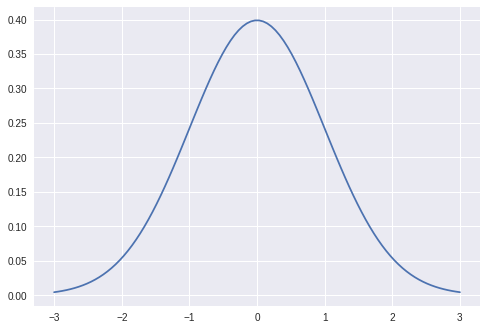

In [0]:
xpoints = np.linspace(-3,3,100)
ypoints = [dN(i) for i in xpoints]
print(ypoints)
plt.plot(xpoints,ypoints)

Let us define cumulative density function of standard normal random variable
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [0]:
def N(d):
    ''' Cumulative density function of standard normal random variable x. '''
    fx = lambda x: dN(x)
    CDF = quad(fx, -50, d, limit=50)[0]
    return CDF

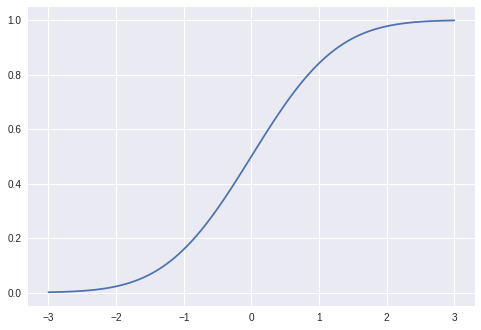

In [0]:
ypoints = [N(i) for i in xpoints]
plt.plot(xpoints,ypoints)

In [0]:
print(N(0))

0.5


## Black–Scholes model
* https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model

<br>

### Call Option Value

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/02b3399c25f96bc2ce3a70dbce628620cf726c29)


In [0]:
def d1f(St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function. Parameters see e.g. BSM_call_value function. '''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2 ) * (T - t) ) / (sigma * math.sqrt(T - t))
    return d1

In [0]:
def d2f(St,K,t,T,r,sigma):
  d1 = d1f(St,K,t,T,r,sigma)
  d2 = d1 - sigma*math.sqrt(T-t)
  return d2

Now, let us write down BSM valuation function (call and put options):

In [0]:
def BSM_call_value(St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    Parameters
    ==========
    St : float (real number)
        stock/index level at time t
    K : float
        strike price (exercise price)
    t : float
        valuation date (pricing date)
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate (risk free rate)
    sigma : float
        volatility
    Returns
    =======
    call_value : float
        European call present value at t
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d2f(St,K,t,T,r,sigma)
    call_value = N(d1) * St -  K * N(d2) * math.exp(-r * (T - t))
    return call_value


In [0]:
BSM_call_value(100, 150, 0.3,1, 0.02, 0.05)

2.1507237781192043e-21

### Put Call Parity

"In financial mathematics, put–call parity defines a relationship between the price of a European call option and European put option, both with the identical strike price and expiry, namely that a portfolio of a long call option and a short put option is equivalent to (and hence has the same value as) a single forward contract at this strike price and expiry."

* https://en.wikipedia.org/wiki/Put%E2%80%93call_parity


European-style put-call parity for options on assets with same exercise price $K$

$$ \text{Put Value} - \text{Call Value} = K e^{-r(T-t)} - S_t $$

### Put Option Value
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ed2a3d59c05c42219bc864b50099ebd5baf4297)

In [0]:
def BSM_put_value(St, K, t, T, r, sigma): 

    ''' Calculates Black-Scholes-Merton European put option value.
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
    Returns
    =======
    put_value : float
        European put present value at t
    '''

    put_value = K * math.exp(-r * (T - t)) - St + BSM_call_value(St, K, t, T, r, sigma)
    return put_value


We implemented BSM formula for European call and put option values. Next, let us simulate the option values. 

In [0]:
K = 8000  # strike price
T = 1.0  # time-to-maturity, which means t=0
r = 0.025  # constant, risk-less short rate
vol = 0.2  # constant volatility
# Sample Data Generation
S = np.linspace(4000, 12000, 150)  # vector of index level values
h = np.maximum(S - K, 0)  # inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S]
# calculate call option values


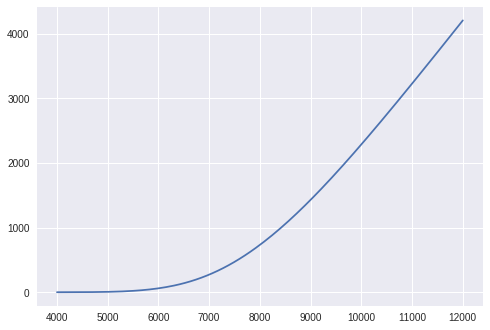

In [0]:
plt.plot(S,C)

Let us generate plot for the simulated call option value above...

Text(0,0.5,'present value $C(t=0)$')

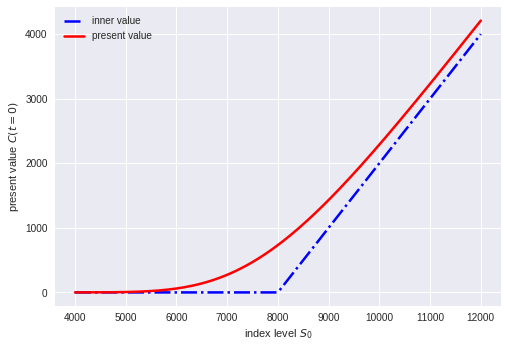

In [0]:
# Graphical Output
plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
# plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')
